In [1]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from tqdm import tqdm, trange
from time import time

# Part 1
## Generating dataset

In [2]:
def generate_data(n=1000, d=2):
    X = np.random.uniform(0, 1, size=(n, d))
    y = X[:, 1] > (1 - X[:, 0])
    return X, y

In [3]:
X_train, y_train = generate_data()
X_test, y_test = generate_data()

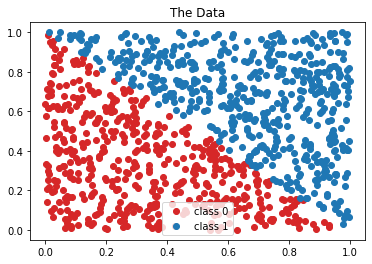

In [4]:
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], label='class 0', c='tab:red')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], label='class 1', c='tab:blue')
plt.legend()
plt.title('The Data')
plt.show()

## Classifying the Data

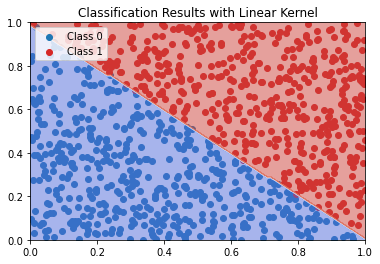

linear kernel: train accuracy 99.40% test accuracy 99.80% train time 8.39e-03 test time 7.51e-03


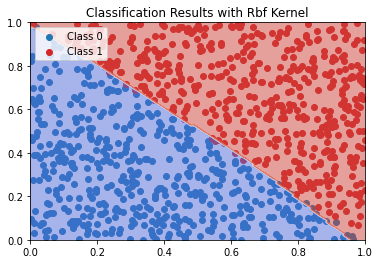

rbf kernel: train accuracy 99.50% test accuracy 98.80% train time 0.00e+00 test time 1.56e-02


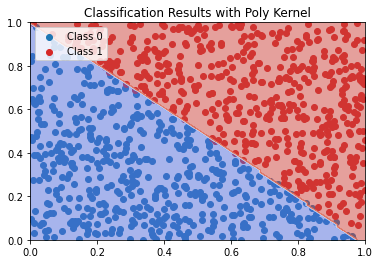

poly kernel: train accuracy 99.70% test accuracy 99.40% train time 0.00e+00 test time 0.00e+00


In [5]:
def plot_decision_area(svc, kernel, h=0.01):
    xx, yy = np.meshgrid(np.arange(0, 1.01, h),
                         np.arange(0, 1.01, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
    

for kernel in ['linear', 'rbf', 'poly']:
    svc = SVC(kernel=kernel)
    
    start = time()
    svc.fit(X_train, y_train)
    train_time = time() - start
    
    start = time()
    pred = svc.predict(X_test)
    test_time = time() - start
    
    plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], label='Class 0', color='tab:blue')
    plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], label='Class 1', color='tab:red')
    plot_decision_area(svc, kernel)
    plt.legend()
    plt.title(f'Classification Results with {kernel.title()} Kernel')
    plt.show()
    
    print('{} kernel: train accuracy {:.2%} test accuracy {:.2%} train time {:.2e} test time {:.2e}'
      .format(kernel, svc.score(X_train, y_train), svc.score(X_test, y_test), train_time, test_time))


Linear kernel has the longest train time, RBF has the longest test time and poly has the lowest times for both.

The most suitable kernel is linear since the actual distribution's decision boundry is linear, also it reaches the lowest error of 0.1%.

# Part 2

100%|████████████████████████████████████████████████████████████████████████████████| 199/199 [00:09<00:00, 20.08it/s]


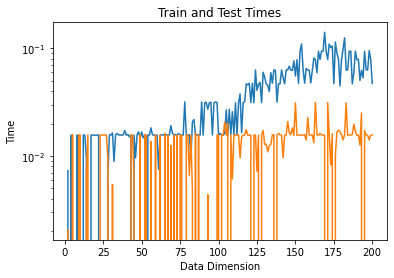

In [6]:
dd = range(2, 201)
train_times = []
test_times = []

for d in tqdm(dd):
    X_train, y_train = generate_data(d=d)
    X_test, y_test = generate_data(d=d)
    svc = SVC(kernel='linear')
    
    start = time()
    svc.fit(X_train, y_train)
    train_times.append(time() - start)
    
    start = time()
    pred = svc.predict(X_test)
    test_times.append(time() - start)
    
plt.plot(dd, train_times, label='train_times')
plt.plot(dd, test_times, label='test_times')
plt.yscale('log')
plt.title('Train and Test Times')
plt.ylabel('Time')
plt.xlabel('Data Dimension')
plt.show()

Train times radically increase as the dimension increases but test times remains relatively consistent

In [7]:
def get_test_error(n, p):
    X_train, y_train = generate_data(n=n,d=p)
    X_test, y_test = generate_data(n=1000, d=p)
    svc = SVC(kernel='linear').fit(X_train, y_train)
    return svc.score(X_test, y_test)

N = 50
nn = np.linspace(10, 100, num=N, dtype=int)
pp = np.linspace(10, 100, num=N, dtype=int)
res = np.empty((N, N))
for i in trange(N):
    for j in range(N):
        res[i, j] = get_test_error(nn[i], pp[j])

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:08<00:00,  6.22it/s]


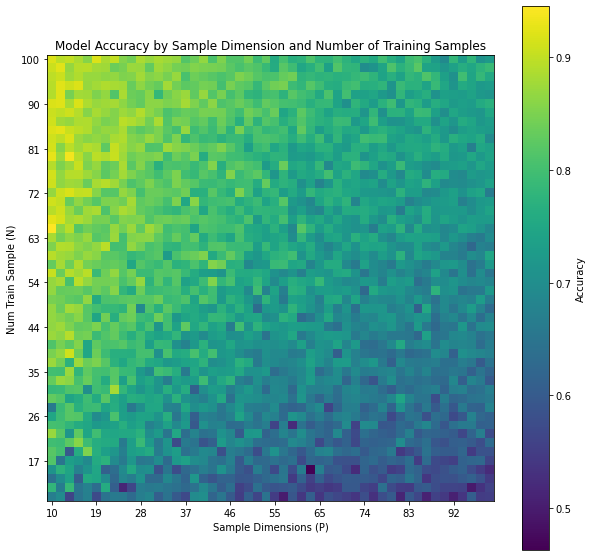

In [8]:
plt.figure(figsize=(10, 10))
plt.imshow(res[::-1])
plt.xticks(range(N), pp)
plt.yticks(range(N), nn[::-1])
plt.xlabel('Sample Dimensions (P)')
plt.ylabel('Num Train Sample (N)')
plt.locator_params(nbins=10)
plt.colorbar(label='Accuracy')
plt.title('Model Accuracy by Sample Dimension and Number of Training Samples')
plt.show()

When $N > P$, the accuracy is high, as $P$ increases, the accuracy decreases.

# Part 3

The data is created with radius $\sqrt{\frac{1}{2\pi}}$ so that the area of the circle is $\frac{1}{2}$, so that the classes are balanced.

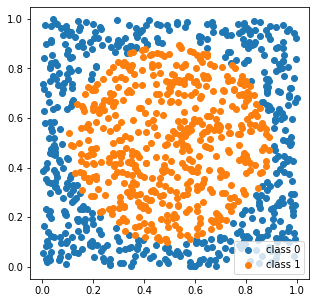

In [9]:
def generate_circle_data(n, r=0.25):
    X = np.random.uniform(0, 1, size=(n, 2))
    y = (((X - 0.5) ** 2).sum(1) ** 0.5) < np.sqrt(0.5 / np.pi)
    return X, y

X, y = generate_circle_data(1000)
plt.figure(figsize=(5, 5))
plt.scatter(X[~y, 0], X[~y, 1], label='class 0')
plt.scatter(X[y, 0], X[y, 1], label='class 1')
plt.legend()
plt.show()

In [10]:
X_train, y_train = generate_circle_data(1000)
X_test, y_test = generate_circle_data(1000)

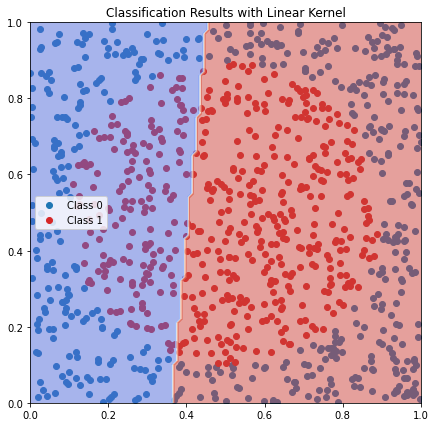

linear kernel: train accuracy 57.70% test accuracy 53.70% train time 2.97e-02 test time 3.14e-02


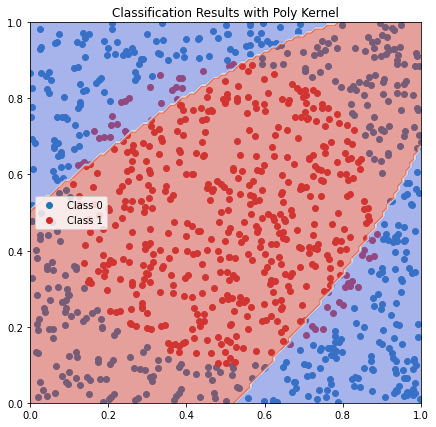

poly kernel: train accuracy 71.00% test accuracy 72.00% train time 3.23e-02 test time 1.59e-02


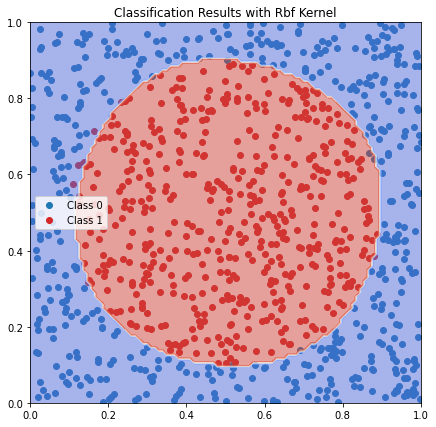

rbf kernel: train accuracy 98.80% test accuracy 98.80% train time 1.57e-02 test time 3.12e-02


In [11]:
for kernel in ['linear', 'poly', 'rbf']:
    svc = SVC(kernel=kernel, degree=2)
    
    start = time()
    svc.fit(X_train, y_train)
    train_time = time() - start
    
    start = time()
    pred = svc.predict(X_test)
    test_time = time() - start
    
    plt.figure(figsize=(7, 7))
    plt.scatter(X_test[~y_test, 0], X_test[~y_test, 1], label='Class 0', color='tab:blue')
    plt.scatter(X_test[y_test, 0], X_test[y_test, 1], label='Class 1', color='tab:red')
    plot_decision_area(svc, kernel)
    plt.legend()
    plt.title(f'Classification Results with {kernel.title()} Kernel')
    plt.show()
    
    print('{} kernel: train accuracy {:.2%} test accuracy {:.2%} train time {:.2e} test time {:.2e}'
      .format(kernel, svc.score(X_train, y_train), svc.score(X_test, y_test), train_time, test_time))


The linear kernel does a poor job at fitting the data, achieving accuracy of 57.7%, a polynomial kernel with degree 2 is better, achieving 72% test accuracy, while the RBF kernel is clearly the best, achieving 98.8% accuracy. That makes sense as the d